# Human Activity Recognition Model - Part 2
## Exploratory Data Analysis. Deducing which numeric signals represent physiotherapy exercises, which will in turn help us to predict specific human activity.

#### Natasha Qayyum - 2021

Background: <br>
MEx is a multimodel dataset containing data for 7 different physiotherapy exercises performed by 30 subjects, recorded by four sensor modalities. This analysis utilises the data recorded by one of these modalities, the Sensing Tex Pressure Mat (sampling frequency 15Hz, frame size 32 * 16), which is both rich and sparse.

The aim is to intelligently select a subset of the 512 features, to train a machine learning (ML) model whilst demonstrating a beneficial application of Feature Selection in the pre-processing steps. The ML model seeks to predict which physiotherapy exercise a subject is performing on the pressure mat, according to sensor readings. 

Benefits of feature selection include:
- Reduced training times
- Reduced computational requirements
- Remove irrelevant features, for example those pressure points which have never picked up a signal
- Reduce overfitting, seperating the signal from the noise


### Importing dependency packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from timeit import default_timer as timer
import sklearn as sklearn

### Importing dataset

In [2]:
pm_df = pd.read_csv('all_pm_data.csv')
pm_df

,Unnamed: 0,Subject,Exercise,a_Time,r_Time,Total_p,1_1,1_2,1_3,1_4,...,32_7,32_8,32_9,32_10,32_11,32_12,32_13,32_14,32_15,32_16
0,0,1,1,2018-11-08 11:34:51.535000,0 days 00:00:00,27375.0,20.0,3.0,2.0,0.0,...,104.0,93.0,58.0,78.0,53.0,192.0,388.0,330.0,123.0,6.0
1,1,1,1,2018-11-08 11:34:51.602000,0 days 00:00:00.067000,27466.0,20.0,3.0,2.0,0.0,...,106.0,93.0,64.0,78.0,53.0,195.0,390.0,330.0,119.0,7.0
2,2,1,1,2018-11-08 11:34:51.669000,0 days 00:00:00.134000,27423.0,20.0,3.0,2.0,0.0,...,108.0,94.0,66.0,79.0,55.0,196.0,391.0,324.0,106.0,5.0
3,3,1,1,2018-11-08 11:34:51.737000,0 days 00:00:00.202000,27651.0,20.0,3.0,2.0,0.0,...,125.0,94.0,64.0,79.0,55.0,194.0,391.0,321.0,114.0,6.0
4,4,1,1,2018-11-08 11:34:51.804000,0 days 00:00:00.269000,27416.0,20.0,3.0,2.0,0.0,...,129.0,95.0,64.0,79.0,55.0,194.0,381.0,321.0,114.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188111,922,30,7,2019-03-26 16:45:51.454000,0 days 00:01:01.976000,578.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188112,923,30,7,2019-03-26 16:45:51.522000,0 days 00:01:02.044000,633.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188113,924,30,7,2019-03-26 16:45:51.589000,0 days 00:01:02.111000,696.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188114,925,30,7,2019-03-26 16:45:51.656000,0 days 00:01:02.178000,704.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#rename 'subject x exercise datapoint' column name
pm_df.rename(columns={'Unnamed: 0': 'SE_datapoint'}, inplace=True) 
pm_df.head()

,SE_datapoint,Subject,Exercise,a_Time,r_Time,Total_p,1_1,1_2,1_3,1_4,...,32_7,32_8,32_9,32_10,32_11,32_12,32_13,32_14,32_15,32_16
0,0,1,1,2018-11-08 11:34:51.535000,0 days 00:00:00,27375.0,20.0,3.0,2.0,0.0,...,104.0,93.0,58.0,78.0,53.0,192.0,388.0,330.0,123.0,6.0
1,1,1,1,2018-11-08 11:34:51.602000,0 days 00:00:00.067000,27466.0,20.0,3.0,2.0,0.0,...,106.0,93.0,64.0,78.0,53.0,195.0,390.0,330.0,119.0,7.0
2,2,1,1,2018-11-08 11:34:51.669000,0 days 00:00:00.134000,27423.0,20.0,3.0,2.0,0.0,...,108.0,94.0,66.0,79.0,55.0,196.0,391.0,324.0,106.0,5.0
3,3,1,1,2018-11-08 11:34:51.737000,0 days 00:00:00.202000,27651.0,20.0,3.0,2.0,0.0,...,125.0,94.0,64.0,79.0,55.0,194.0,391.0,321.0,114.0,6.0
4,4,1,1,2018-11-08 11:34:51.804000,0 days 00:00:00.269000,27416.0,20.0,3.0,2.0,0.0,...,129.0,95.0,64.0,79.0,55.0,194.0,381.0,321.0,114.0,6.0


### Visualising a Single Row of Data

<AxesSubplot:>

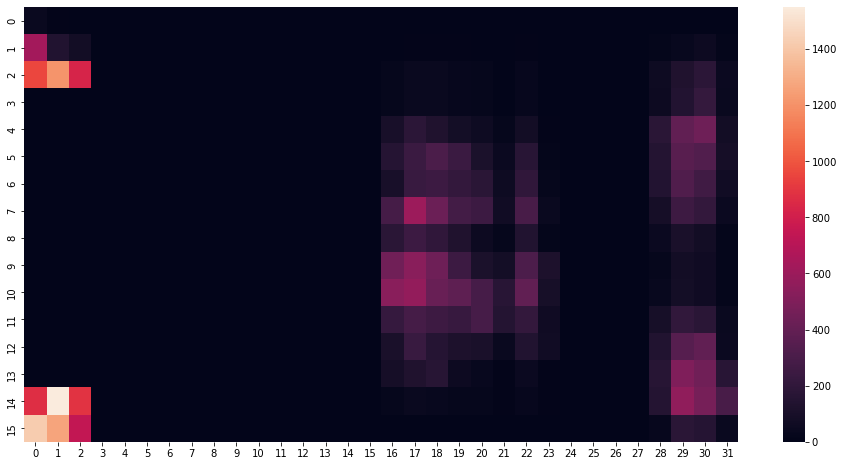

In [4]:
#using seaborn to visualise one data point as an X-Y heatmap
#1520 is just a nice one, can alter the row number to anything
rowNum = 1520

#create an array using the pressure point readings in the specified row 
heatmapData = pm_df.iloc[rowNum, 6:len(pm_df.columns)].to_numpy() #start from column index 6 until the end
heatmapData = heatmapData.reshape(32, 16).astype(float) #reshape the datapoints into a 32x16 grid

plt.figure(figsize=(16, 8)) #defining the size and dimensions of the graph
sns.heatmap(heatmapData.T, vmin=0, vmax=1550) #display the heatmap with defined scale
#sns.heatmap(heatmapData.T) #display the heatmap with relative scale



This heatmap is a perfect visual representation of pressure being applied to a yoga mat with pressure sensors. The row number can be altered to visualise the pressure being applied at a specific point in time.

### Exploring the distribution of sensor readings amongst exercises and subjects

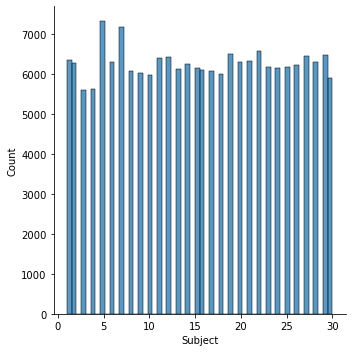

In [5]:
sns.displot(pm_df.loc[:, 'Subject'])

Each subject has an extensive number of datapoints, and none stand out as reason to exclude. 

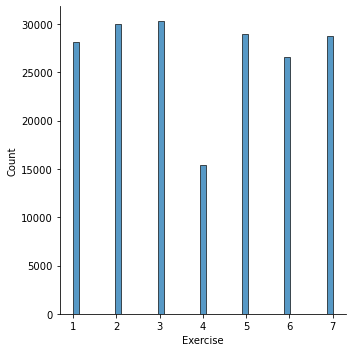

In [6]:
sns.displot(pm_df.loc[:, 'Exercise'])

Perhaps avoid exercise 4 as an example when designing feature selection and ML methods, due to the significantly lower number of datapoints.

### Exploring Total Pressure and Plotting Timeseries

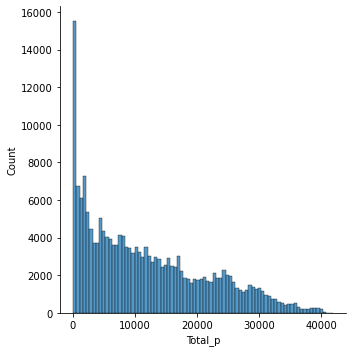

In [7]:
# plotting distribution of total pressure
sns.displot(pm_df.loc[:, 'Total_p'])

The most common total pressure is zero i.e. when there is no subject on the mat (including jumps).

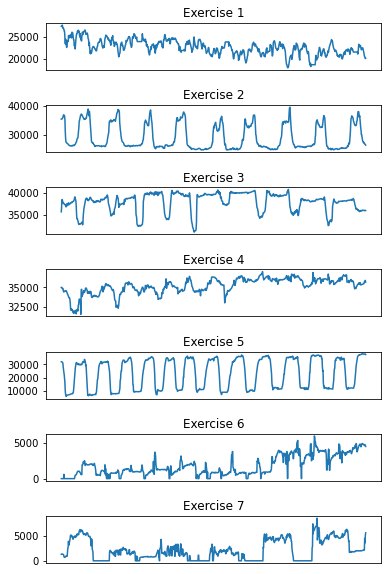

In [8]:
# plotting total pressure against time

whichsubject = 1
whichexercise = 1
numexercise = 7

fig, ax = plt.subplots(numexercise)

for i in range(1,numexercise+1):
    exercise = pm_df.loc[(pm_df['Subject'] == whichsubject) & (pm_df['Exercise'] == i)]
    ax[i-1].plot(exercise.loc[:,'r_Time'], exercise.loc[:,'Total_p']) #plot relative time against total pressure
    #ax[i-1].get_yaxis().set_visible(False) #hide y axis
    ax[i-1].get_xaxis().set_visible(False) #hide x axis
    ax[i-1].title.set_text("Exercise {}".format(i)) #set titles per subplot according to exercise number
    plt.subplots_adjust(top=2, hspace=0.75) #adjust spacing between subplots




Each exercise has its own pattern of total pressure over time, producing some very distinctive repetitive shapes.

### Next see Part 3 for feature selection and how this affects the performance of a ML Model